In [1456]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

plt.style.use('ggplot')

In [1457]:
data = sns.load_dataset('tips')

In [1458]:
X = np.array(data['total_bill'])
Y = np.array(data['tip'])

In [1459]:
X.shape

(244,)

In [1460]:
X = X.reshape(244)
Y = Y.reshape(244)

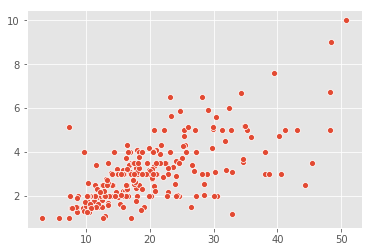

In [1461]:
sns.scatterplot(X, Y);

In [1462]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1463]:
X_train = X_train.reshape(X_train.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])
X_test = X_test.reshape(X_test.shape[0])
Y_test = Y_test.reshape(Y_test.shape[0])

In [1464]:
plot_x = []
plot_y = []
plot_z = []

for i in range(len(X_test)):
    X0 = X_test[i]
    X = np.ones((len(X_train), 2))
    W = np.zeros((len(X_train), len(X_train)))
    
    d = np.zeros((len(X_train)))

    for j in range(len(X_train)):
        X[j][1] = X_train[j] - X0
        d[j] = np.abs(X_train[j] - X0)
    
    d /= np.linalg.norm(d, 1)
    
    for j in range(len(X_train)):
        if d[j] < 1:
            W[j][j] = (1 - np.abs(d[j]) ** 3) ** 3
        

    e = np.array([1, 0]).reshape(1, 2)
    XTW = np.dot(X.T, W)

    pred = np.dot(np.dot(np.linalg.inv(np.dot(XTW, X)), XTW), Y_train)[0]
    
    plot_x.append(Y_test[i])
    plot_y.append(X0)
    plot_z.append(pred)

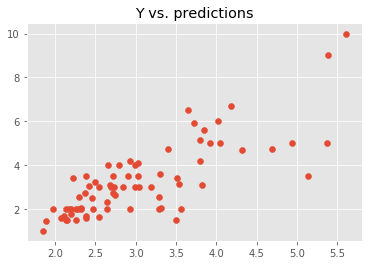

In [1465]:
plt.title('Y vs. predictions')
plt.scatter(plot_z, plot_x);

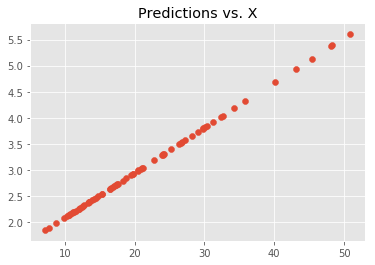

In [1466]:
plt.title('Predictions vs. X')
plt.scatter(plot_y, plot_z);

In [1467]:
plot_x = np.squeeze(plot_x)
plot_x = plot_x.reshape(74)

In [1468]:
plot_z = np.squeeze(plot_z)
plot_z = plot_z.reshape(74)

In [1469]:
pearsonr = np.corrcoef(plot_z, plot_x)[0][1]

In [1470]:
pearsonr ** 2

0.6224498570085901

## Standard linear regression

In [1471]:
from sklearn.linear_model import LinearRegression

In [1472]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1473]:
model.score(X_test.reshape(-1, 1), Y_test)

0.5339471747923641